In [23]:
# General (scientific) computing
import os
import time
import glob
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib.patches import Ellipse
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'Greys_r'

# Astronomical computing
import fitsio
from astropy.visualization import simple_norm, AsinhStretch
#import astroalign as aa
import sep
import scipy
import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u

# Your Image Calibration and Photometry Code
from complete_process import average_bias, average_dark, average_flat, science_exposure
# Note that you do not need to have magnitude errors implemented. That is for lab 1.5! Returning 0 for all
# magnitude errors is fine for now.
from photometry import create_phot_cat, aper_flux, multi_ellipse_aper_flux, aper_mag

In [91]:
408562 / 7500

54.47493333333333

## Fluxes

110.23941326141357
Flux: 8920.47874583479
Flux err: 16.932896309417714


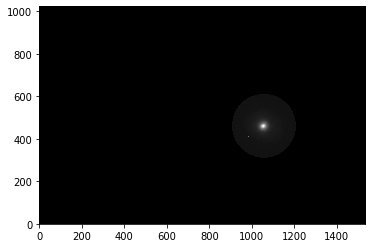

In [88]:
# M94 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
print(np.median(im))
#print(3*60 + 6 * 15)# + 4 * 15)

rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150], 
                                        h_list=[1055], k_list=[460],
                                        bgx=1055, bgy=460, background_width=400, angles=[0], gain=1,
                                        nimages1=9, nimages2=4, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
r_mag, r_magerr = aper_mag(rfl[0], rerrl[0])
plt.imshow(im * (risl[0]))
print("Flux:", rfl[0])
print("Flux err:", rerrl[0])

330.0
Flux: 147.62703704235582
Flux err: 2.212948111545144


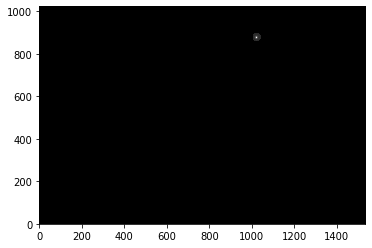

In [89]:
# BD+42 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
print(header['EXPTIME'])
#print(3*60 + 6 * 15)# + 4 * 15)

rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[20], b_list=[20], 
                                        h_list=[1021], k_list=[877],
                                        bgx=1021, bgy=877, background_width=90, angles=[0], gain=1,
                                        nimages1=9, nimages2=4, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
ref_r_mag, ref_r_magerr = aper_mag(rfl[0], rerrl[0])
plt.imshow(im * (risl[0]))
print("Flux:", rfl[0])
print("Flux err:", rerrl[0])

7500.0
Flux: 6559.495198439171
Flux err: 2.3175952542282743


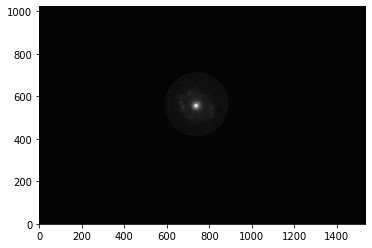

In [90]:
# M94 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150], 
                                        h_list=[740], k_list=[561],
                                        bgx=740, bgy=561, background_width=400, angles=[0], gain=1,
                                        nimages1=85, nimages2=35, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=35*60)
ha_mag, ha_magerr = aper_mag(hafl[0], haerrl[0])
plt.imshow(im * (haisl[0]))
print("Flux:", hafl[0])
print("Flux err:", haerrl[0])

7500.0
Flux: 61.1202406443974
Flux err: 0.29794433217031685


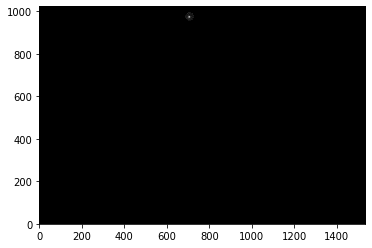

In [75]:
# BD+42 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[20], b_list=[20], 
                                        h_list=[706], k_list=[973],
                                        bgx=706, bgy=973, background_width=90, angles=[0], gain=1,
                                        nimages1=85, nimages2=35, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=35*60)
ref_ha_mag, ref_ha_magerr = aper_mag(hafl[0], haerrl[0])
plt.imshow(im * (haisl[0]))
print("Flux:", hafl[0])
print("Flux err:", haerrl[0])

## Differential Photometry

In [76]:
ref_true_mag = 9.50

In [92]:
# We have to do error propogation here
corrected_mag_Ha = ref_true_mag - ref_ha_mag + ha_mag
corrected_mag_Haerr = np.sqrt(ref_ha_magerr ** 2 + ha_magerr ** 2)
fluxHa = 10 ** (-corrected_mag_Ha/2.5)
fluxHa_err = (corrected_mag_Haerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Haerr))
fluxHa, fluxHa_err, corrected_mag_Ha, corrected_mag_Haerr

(0.01700925777840593,
 0.00016711306083976466,
 4.423286592478789,
 0.005306548668167491)

In [93]:
# We have to do error propogation here
corrected_mag_R = ref_true_mag - ref_r_mag + r_mag
corrected_mag_Rerr = np.sqrt(ref_r_magerr ** 2 + r_magerr ** 2)
fluxR = 10 ** (-corrected_mag_R/2.5)
fluxR_err = (corrected_mag_Rerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Rerr))
fluxR, fluxR_err, corrected_mag_R, corrected_mag_Rerr

(0.00957684061200201,
 0.001702545754303739,
 5.046944351279807,
 0.01640529459460682)

## Flux Subtraction

In [94]:
DW = 13462.1 / 306.75
DW

43.88622656886716

In [95]:
# Now we will calculate the difference in Flux
# We have to do error propogation here
dF = 10 ** (2.5 * corrected_mag_Ha) - (10 ** (2.5 * corrected_mag_R) / DW)
dFerr = np.sqrt((corrected_mag_Haerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Haerr)) ** 2 + (corrected_mag_Rerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Rerr)) ** 2)
print("Flux difference is", dF)
print("Flux difference error is", dFerr)  # This might be fixed if the error in the photometry aper_flux
                                          # is fixed

Flux difference is 19931633791.504013
Flux difference error is 0.10845312118047376


## Luminosity

In [96]:
h = scipy.constants.h
c = scipy.constants.c

In [97]:
# Don't worry about this error propagation
R_avg_lambda = 658
R_photon_energy = h * c * 10**9 / R_avg_lambda
Ha_avg_lambda = 656.3
Ha_photon_energy = h * c * 10**9 / Ha_avg_lambda
print(R_photon_energy, Ha_photon_energy, R_photon_energy / Ha_photon_energy)

3.0189146765181287e-19 3.0267345073120964e-19 0.9974164133738601


In [98]:
h = scipy.constants.Planck
print(h)
c = scipy.constants.c
def turn_into_wattsm2(rate, rate_err, area, lam):
    """Turn
        - rate, which is in photons / second,
        - area, which is area of the primary mirror in m^2,
        - lam, which is in nm
    into Watts / m^2
    """
    energy = h * c * 10**9 / lam
    return energy * rate / area, np.sqrt((rate_err ** 2) * energy / area)
    
# These lines are a test
rate = 100
rate_err = 10
r = 24 * 2.54 # cm
area = (r ** 2) / 10000  # m^2
lam = 658
print(area, "m mirror")
print(rate, "photons per second are detected by CCD")
print(lam, "nm avg wavelength of light let in by filter")
print(turn_into_wattsm2(rate, rate_err, area, lam), "W/m^2")

6.62607015e-34
0.37161215999999997 m mirror
100 photons per second are detected by CCD
658 nm avg wavelength of light let in by filter
(8.123831783432838e-17, 9.013230155406462e-09) W/m^2


In [99]:
r = 12 * 2.54 * 0.01 # m
area = np.pi * (r ** 2) # m^2
wattsR, wattsR_err = turn_into_wattsm2(fluxR, fluxR_err, area, R_avg_lambda)
wattsHa, wattsHa_err = turn_into_wattsm2(fluxHa, fluxHa_err, area, Ha_avg_lambda)
difference = wattsHa - wattsR / DW
cov = 0
dif_err = np.sqrt((wattsHa_err ** 2) + ((wattsR_err ** 2) / (DW ** 2)) - (2 * cov / DW))
print(difference)
print(dif_err)

1.7413523555731217e-20
1.7469357031382544e-13


In [100]:
dv = (c * (10 ** 9)/370) - (c * (10 ** 9)/410)
dv * 3.39 * (10**-26)

2.6797532831114042e-12

In [101]:
print(wattsHa, wattsR)  # This seems wrong

1.763924096625866e-20 9.905885418945337e-21


In [102]:
d = 4.9 * 3.086e22  # m, error is +- 0.4 
derr = 0.4 * 3.086e22
L = 4 * np.pi * (d ** 2) * difference
Lerr = np.sqrt((((4 * np.pi * d ** 2) ** 2) * (dif_err ** 2)) + ((8 * np.pi * d * difference) ** 2 * (derr ** 2)))
print("Luminosity is", L, "watts.")
Lergs = L * 10000000  # ergs/s
Lergs_err = Lerr * 10000000
print("Luminosity is", Lergs, "ergs.")
SFR = Lergs * 7.9 * 10e-42
SFR_err = Lergs_err * 7.9 * 10e-42
print("SFR =", SFR, "solar masses a year")
print(SFR_err)

Luminosity is 5.003576282697162e+27 watts.
Luminosity is 5.0035762826971615e+34 ergs.
SFR = 3.952825263330757e-06 solar masses a year
39.6549931935324


## Compare to literature

https://www.cosmotography.com/images/m94_0907.4884v1.pdf

From this paper, "We find that the total SFR for M94 is 1.04 M⊙yr−1"

It is distributed as follows:
- Bulge (0.75 M⊙yr−1)
- Inner disk (0.14 M⊙yr−1)
- Outer disk (0.15 M⊙yr−1)

## TODO

- Right now, some of the flux errors are bigger than the fluxes
- Need to do error propagation all the way through
- Improve the parameters so that we get closer to the literature value

In [17]:
#fR = None
#fRerr = None
#fHa = None
#fHaerr = None
#DW = None
#
#EHaf = fHa - (fR / DW)
#EHaf_err = np.sqrt((fRerr ** 2) + (fHaerr ** 2) + ?????????)

In [18]:
#d = None
#derr = None
#f = None
#ferr = None
#
#L = 4 * np.pi * (d ** 2) * f
#Lerr = 4 * np.pi * (ferr * (d ** 2) + derr * 2 * d * f)